In [1]:
from collections import Counter
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from surgeNN.io import load_predictand,load_predictors
from target_relevance import TargetRelevance #if starting with a clean environment, first, in terminal, do->'mamba install kdepy'
from surgeNN.preprocessing import get_denseloss_weights
import matplotlib.pyplot as plt
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

temp_freq=3
tg = 'stavanger-svg-nor-nhs.csv'

2024-09-13 10:40:36.773578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [2]:
y = load_predictand('/home/jovyan/test_surge_models/input/t_tide_'+str(temp_freq)+'h_anoms_deseasoned_predictands',tg)

In [3]:
surge = y.surge.values

In [4]:
threshold = np.nanpercentile(surge,99)
threshold

0.3507535985160458

In [5]:
surge_is_extreme = surge>threshold
extreme_surge = surge[surge_is_extreme]

In [6]:
extreme_surge.shape

(2483,)

In [7]:
w = get_denseloss_weights(surge,3)

In [49]:
np.mean(w)

1.0000000000000002

In [46]:
new_w = w* np.sqrt(np.maximum(surge/threshold,1))
new_w = 

In [34]:
test = w[surge_is_extreme] * np.sqrt(extreme_surge/np.min(extreme_surge))
test

array([11.61674885, 11.48184456, 11.6541276 , ..., 13.27493612,
       12.9589862 , 11.41688455])

In [40]:
np.sum(extreme_surge[-500]>extreme_surge)/len(extreme_surge)

0.8715263793797825

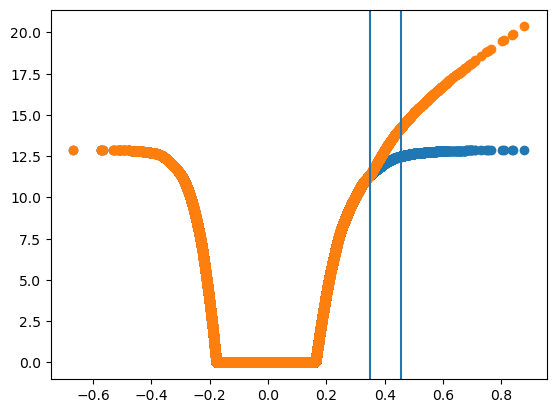

In [47]:
plt.figure()
plt.scatter(surge,w)
plt.axvline(x=threshold)
plt.axvline(x=np.percentile(extreme_surge,75))
plt.scatter(surge,new_w)

In [33]:
np.sqrt(2)

1.4142135623730951

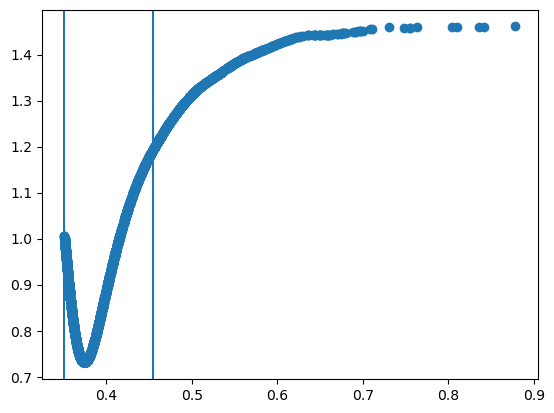

In [17]:
plt.figure()
plt.scatter(extreme_surge,wext)
plt.axvline(x=threshold)
plt.axvline(x=np.percentile(extreme_surge,75))